# EDA 

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from pandas import Series 
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns 
from datetime import datetime

##changing matplotlib parameters
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')
insta_names = ['exploringlondon','london','londonbeautifullife','visitlondon']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


####



from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from fbprophet import Prophet


## Functions

In [2]:
def bar_time_plot(names, df_name):
    #df_name['time'] = [t.strftime('%H') for t in df_name['time']]
    for nm in names:
        fig = plt.figure(figsize=(22,12))

        my_data = df_name.loc[df_name['insta_name'] == nm]
        for i,d in enumerate(days): 
            df_day = my_data.loc[my_data['day'] == d]
            df_day = df_day.groupby(df_name['time'])['num_of_likes'].mean().reset_index()
            ax = fig.add_subplot(3,3,i+1)
            ax.bar(df_day['time'],df_day['num_of_likes'])
            ax.title.set_text(nm + " " + d)
        plt.show

In [3]:
def bar_plot(names, df_name):
    for nm in names:
        my_data = df_name.loc[df_name['insta_name'] == nm]
        my_data = my_data.groupby('day')['num_of_likes'].mean().reset_index()
        fig = plt.figure(figsize=(12,6))
        plt.bar(my_data['day'],my_data['num_of_likes'])
        plt.title(nm)
        for i, v in enumerate(my_data['num_of_likes']):
            v_show = round(v,2)
            plt.text(i-0.3,v,str(v_show))
        plt.show

In [4]:
def get_df(): 
    return df_images

## Exploring Data

In [6]:
df = pd.read_excel('instagram_metadata.xlsx')

In [7]:
df.head()

,insta_name,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time
0,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14:13:34.000Z
1,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,Happy Mother's Day to all the amazing mothers ...,639,628000,870,image,0,31,2,2021-03-14,18:42:15.000Z
2,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,📸 - @photosbyjet - who else misses Harrods? Br...,505,628000,3032,image,0,31,3,2021-03-13,18:45:35.000Z
3,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,📸 - @girlwiththeredbob - this photo by @girlwi...,570,628000,994,image,0,31,3,2021-03-12,15:11:30.000Z
4,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,image,0,31,1,2021-03-10,14:35:39.000Z


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369 entries, 0 to 6368
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   insta_name       6369 non-null   object
 1   source_image     6346 non-null   object
 2   Caption          6368 non-null   object
 3   Caption_length   6369 non-null   int64 
 4   followers        6369 non-null   int64 
 5   num_of_likes     6369 non-null   int64 
 6   media_type       6369 non-null   object
 7   video_views      6369 non-null   int64 
 8   num_of_hashtags  6369 non-null   int64 
 9   num_of_mentions  6369 non-null   int64 
 10  date             6369 non-null   object
 11  time             6369 non-null   object
dtypes: int64(6), object(6)
memory usage: 597.2+ KB


In [9]:
df.isnull().sum()

insta_name          0
source_image       23
Caption             1
Caption_length      0
followers           0
num_of_likes        0
media_type          0
video_views         0
num_of_hashtags     0
num_of_mentions     0
date                0
time                0
dtype: int64

There are 23 values that have source image empty, this will not be a problem as I am only looking to get the right images based on other features. On the other hand, there is an empty caption, this will be an issue as I will use caption as one of the features to classify the image. I will be deleting it.
I need to transform the date and time, they are showing as objects.

## Dealing with Empty Values

In [10]:
df = df.dropna(subset = ['Caption'])

In [11]:
df.isnull().sum()

insta_name          0
source_image       23
Caption             0
Caption_length      0
followers           0
num_of_likes        0
media_type          0
video_views         0
num_of_hashtags     0
num_of_mentions     0
date                0
time                0
dtype: int64

In [12]:
df['date']= pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6368
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   insta_name       6368 non-null   object        
 1   source_image     6345 non-null   object        
 2   Caption          6368 non-null   object        
 3   Caption_length   6368 non-null   int64         
 4   followers        6368 non-null   int64         
 5   num_of_likes     6368 non-null   int64         
 6   media_type       6368 non-null   object        
 7   video_views      6368 non-null   int64         
 8   num_of_hashtags  6368 non-null   int64         
 9   num_of_mentions  6368 non-null   int64         
 10  date             6368 non-null   datetime64[ns]
 11  time             6368 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 646.8+ KB


In [14]:
df['time'] = [t [:-8] for t in df['time'] ]

In [15]:
df['time'] = pd.to_datetime(df['time'], format = '%H:%M').dt.time

In [16]:
df['time']

0       14:13:00
1       18:42:00
2       18:45:00
3       15:11:00
4       14:35:00
          ...   
6364    11:26:00
6365    18:12:00
6366    16:57:00
6367    08:39:00
6368    17:13:00
Name: time, Length: 6368, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 6368
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   insta_name       6368 non-null   object        
 1   source_image     6345 non-null   object        
 2   Caption          6368 non-null   object        
 3   Caption_length   6368 non-null   int64         
 4   followers        6368 non-null   int64         
 5   num_of_likes     6368 non-null   int64         
 6   media_type       6368 non-null   object        
 7   video_views      6368 non-null   int64         
 8   num_of_hashtags  6368 non-null   int64         
 9   num_of_mentions  6368 non-null   int64         
 10  date             6368 non-null   datetime64[ns]
 11  time             6368 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 646.8+ KB


## Day to post

I will only focusing on content that are images, I will discard anything that has to do with videos. My scrapper did not get any information from videos. 

In [18]:
df.shape

(6368, 12)

In [19]:
df_images = df.loc[df['media_type']== 'image']

In [20]:
df_images.shape

(5943, 12)

In [21]:
print(df.shape[0] - df_images.shape[0])

425


There were 426 posts that were videos. My data has gone down to 5943 entries in total.

## EDA posting time of day

I want to know what day pictures get more likes, therefore I want to be able to tell what day each date is. 

In [22]:
df_images['day'] = [date.strftime("%A") for date in df_images['date']]

<ipython-input-22-036e7d56e99a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images['day'] = [date.strftime("%A") for date in df_images['date']]


In [23]:
df_images.head()

,insta_name,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time,day
0,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14:13:00,Monday
1,londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,Happy Mother's Day to all the amazing mothers ...,639,628000,870,image,0,31,2,2021-03-14,18:42:00,Sunday
2,londonbeautifullife,https://scontent-lhr8-1.cdninstagram.com/v/t51...,📸 - @photosbyjet - who else misses Harrods? Br...,505,628000,3032,image,0,31,3,2021-03-13,18:45:00,Saturday
3,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,📸 - @girlwiththeredbob - this photo by @girlwi...,570,628000,994,image,0,31,3,2021-03-12,15:11:00,Friday
4,londonbeautifullife,https://scontent-lhr8-2.cdninstagram.com/v/t51...,When the sun takes centre stage ☀️.....Shot fr...,448,628000,574,image,0,31,1,2021-03-10,14:35:00,Wednesday


In [24]:
type(df_images['day'])

pandas.core.series.Series

In [25]:
df_images.groupby(['insta_name']).first()

,source_image,Caption,Caption_length,followers,num_of_likes,media_type,video_views,num_of_hashtags,num_of_mentions,date,time,day
insta_name,,,,,,,,,,,,
exploringlondon,https://scontent-lhr8-1.cdninstagram.com/v/t51...,It's @comicrelief 2021! We're joining in with ...,656,828000,77,image,0,28,1,2021-03-19,12:54:00,Friday
london,https://scontent-lht6-1.cdninstagram.com/v/t51...,"A special moment in #LondonBridge, snapped by ...",242,25000000,42921,image,0,13,1,2021-03-16,17:44:00,Tuesday
londonbeautifullife,https://scontent-lht6-1.cdninstagram.com/v/t51...,1 year ago today was the last day of full free...,549,628000,1078,image,0,31,1,2021-03-15,14:13:00,Monday
thisislondon,https://scontent-lht6-1.cdninstagram.com/v/t51...,Follow @thisislondon to find out best places t...,63,269000,24151,image,0,1,1,2021-01-25,19:57:00,Monday
visitlondon,https://scontent-lcy1-1.cdninstagram.com/v/t51...,We lilac this house a lot 💜 #VisitLondon [📸 @y...,57,964000,12208,image,0,3,1,2021-03-17,18:31:00,Wednesday


### Check Average of Likes per Day

Check the average of likes per day of all the instagram users

<function matplotlib.pyplot.show(close=None, block=None)>

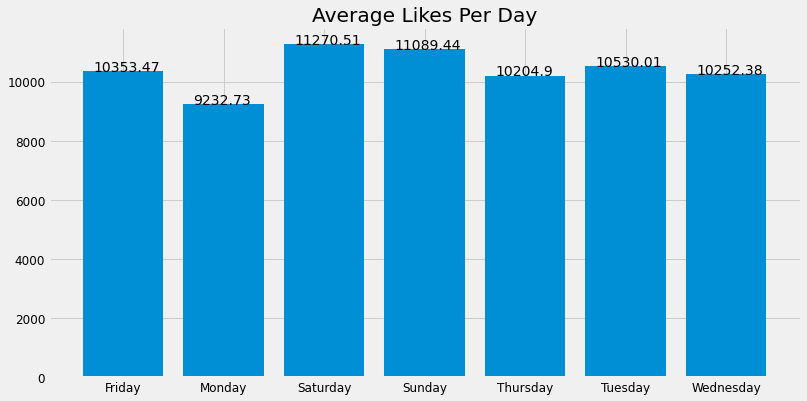

In [26]:
df_weekdays = df_images.groupby('day')['num_of_likes'].mean().reset_index()
fig = plt.figure(figsize=(12,6))
plt.bar(df_weekdays['day'],df_weekdays['num_of_likes'])
for i, v in enumerate(df_weekdays['num_of_likes']):
    v_show = round(v,2)
    plt.text(i-0.3,v,str(v_show))
    
plt.title('Average Likes Per Day')
plt.show

For all of the accounts joined together, Saturday are obviously the preferred day to post as it amounts the most likes, followed by Sunday and Tuesday.

### Average for each instagram account

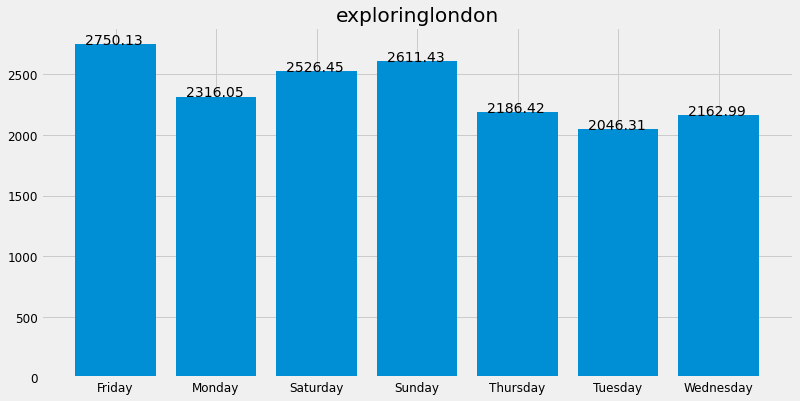

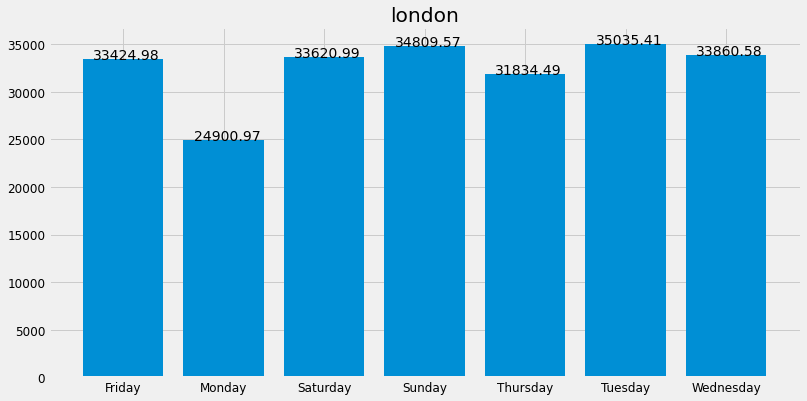

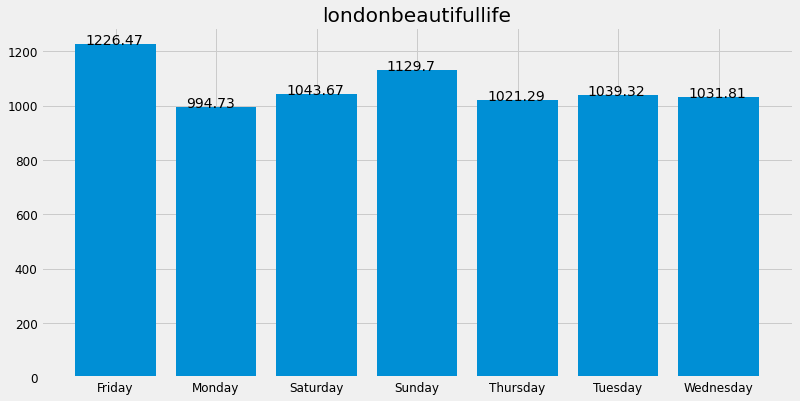

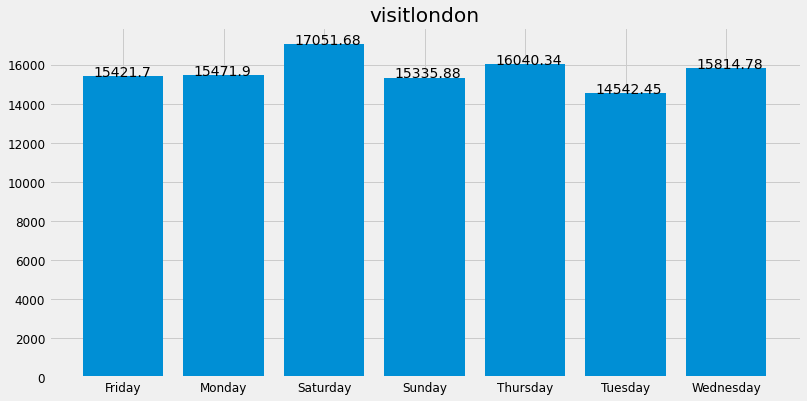

In [27]:
bar_plot(insta_names, df_images)

## Time EDA

Check what times are best to post on each day.

For the bar plots to work I need to change time from a datetime datatype to String

In [28]:
df_images['time'] = [t.strftime('%H') for t in df_images['time']]

<ipython-input-28-fd85d9a25559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images['time'] = [t.strftime('%H') for t in df_images['time']]


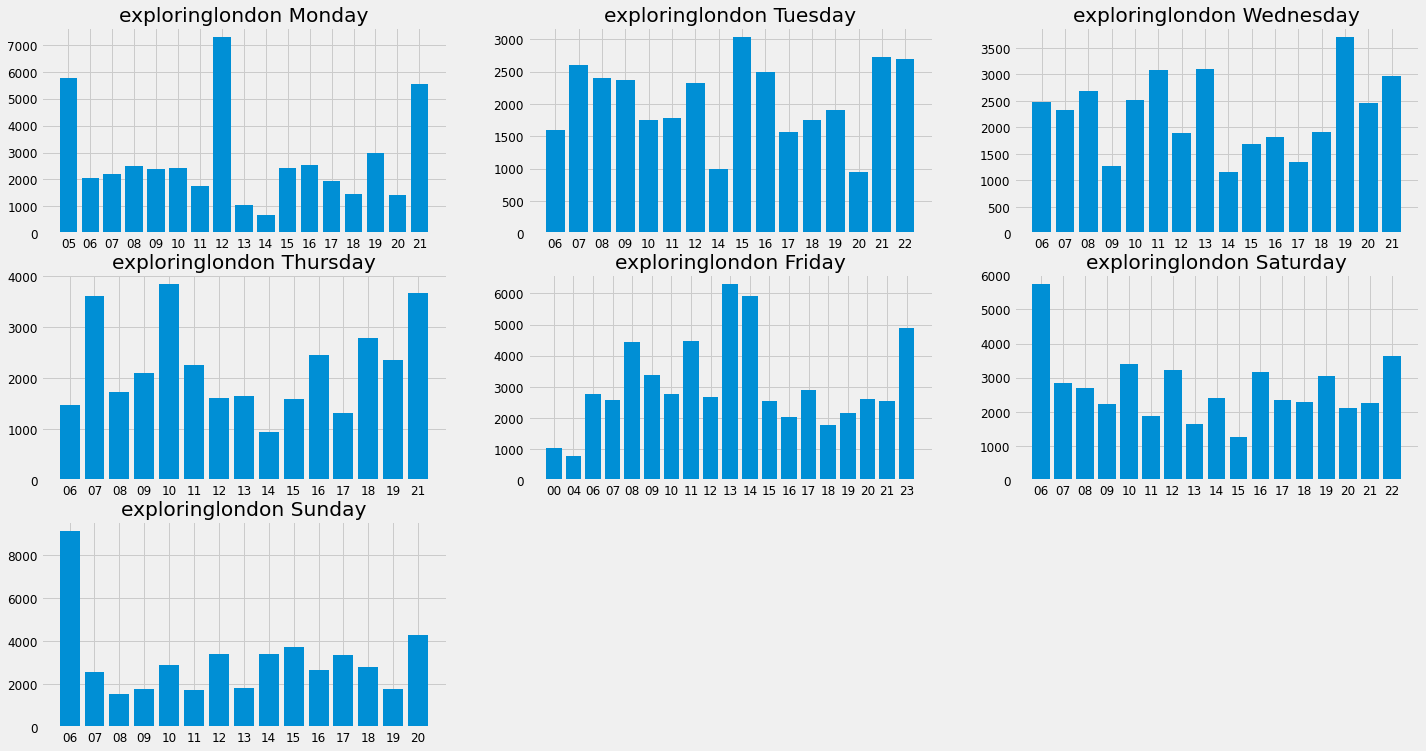

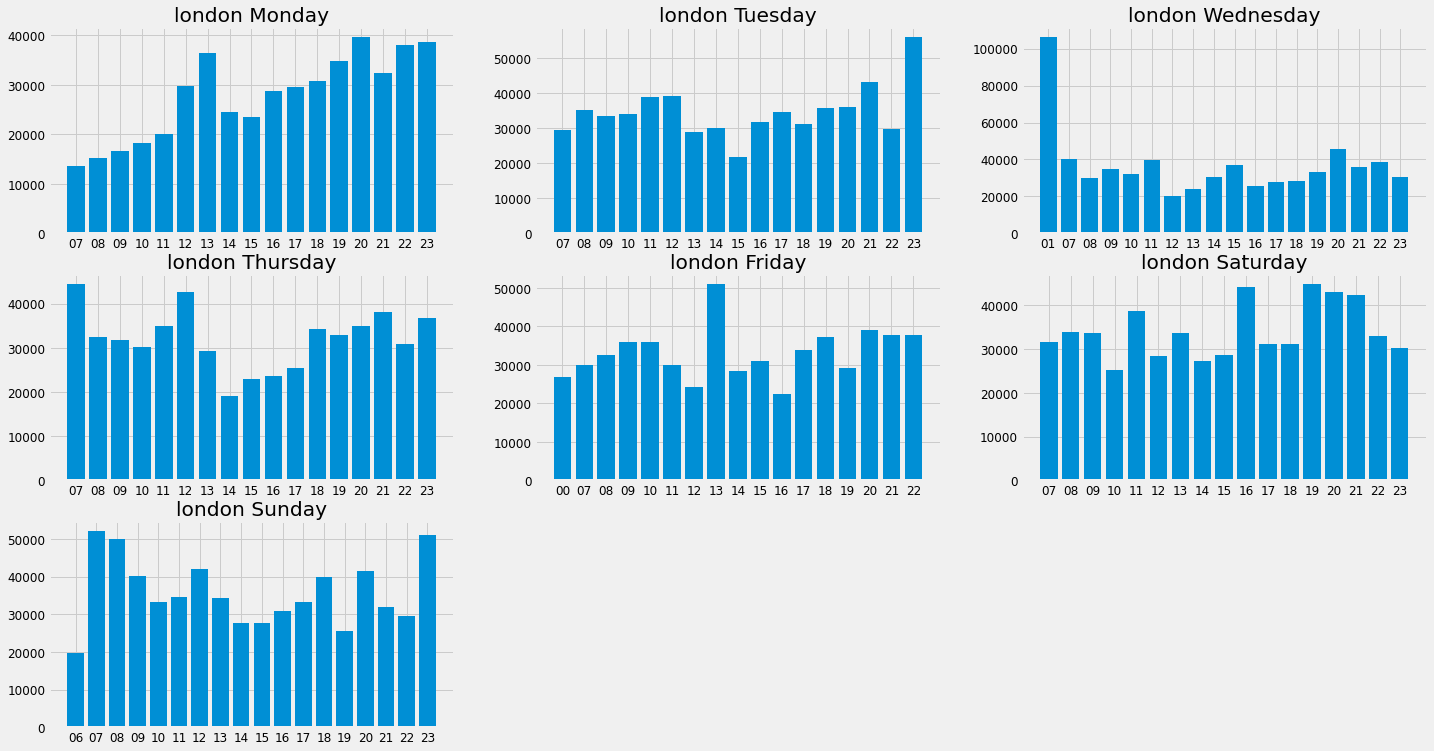

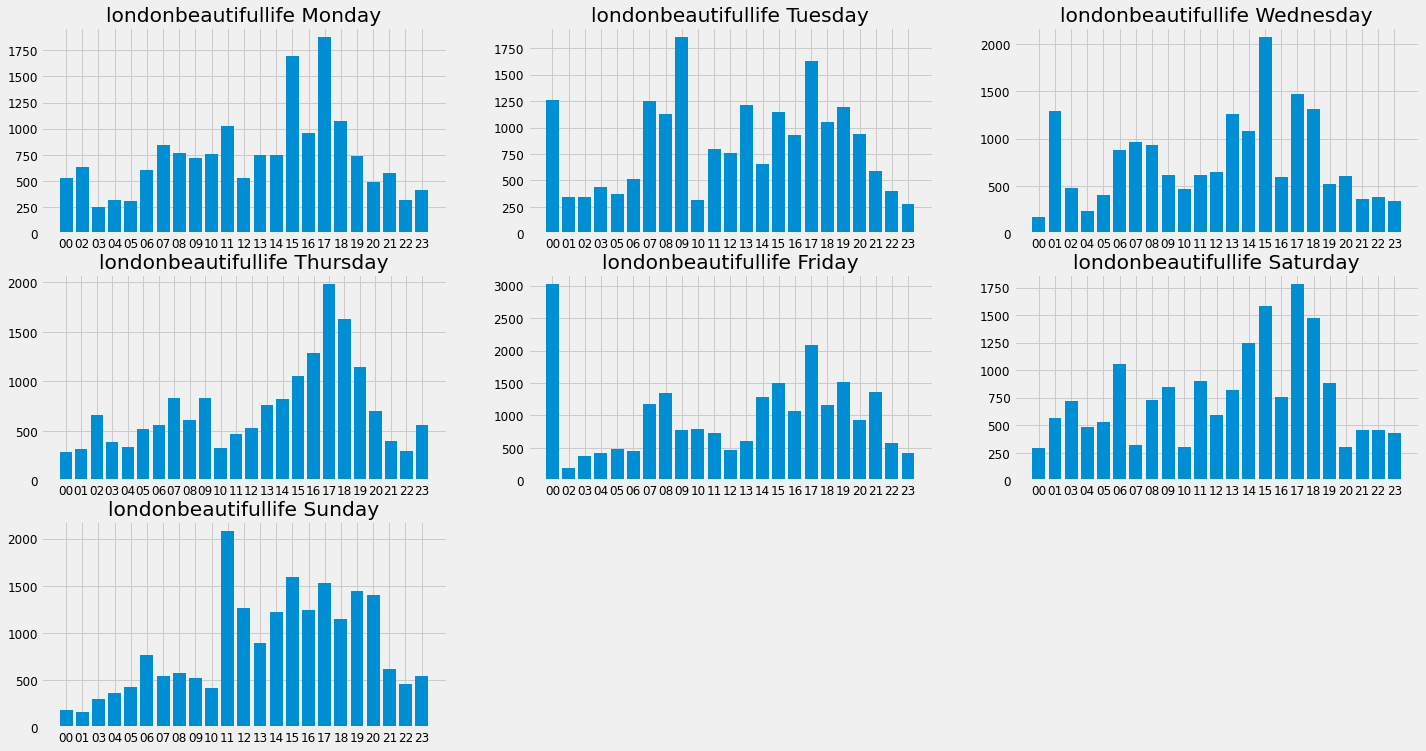

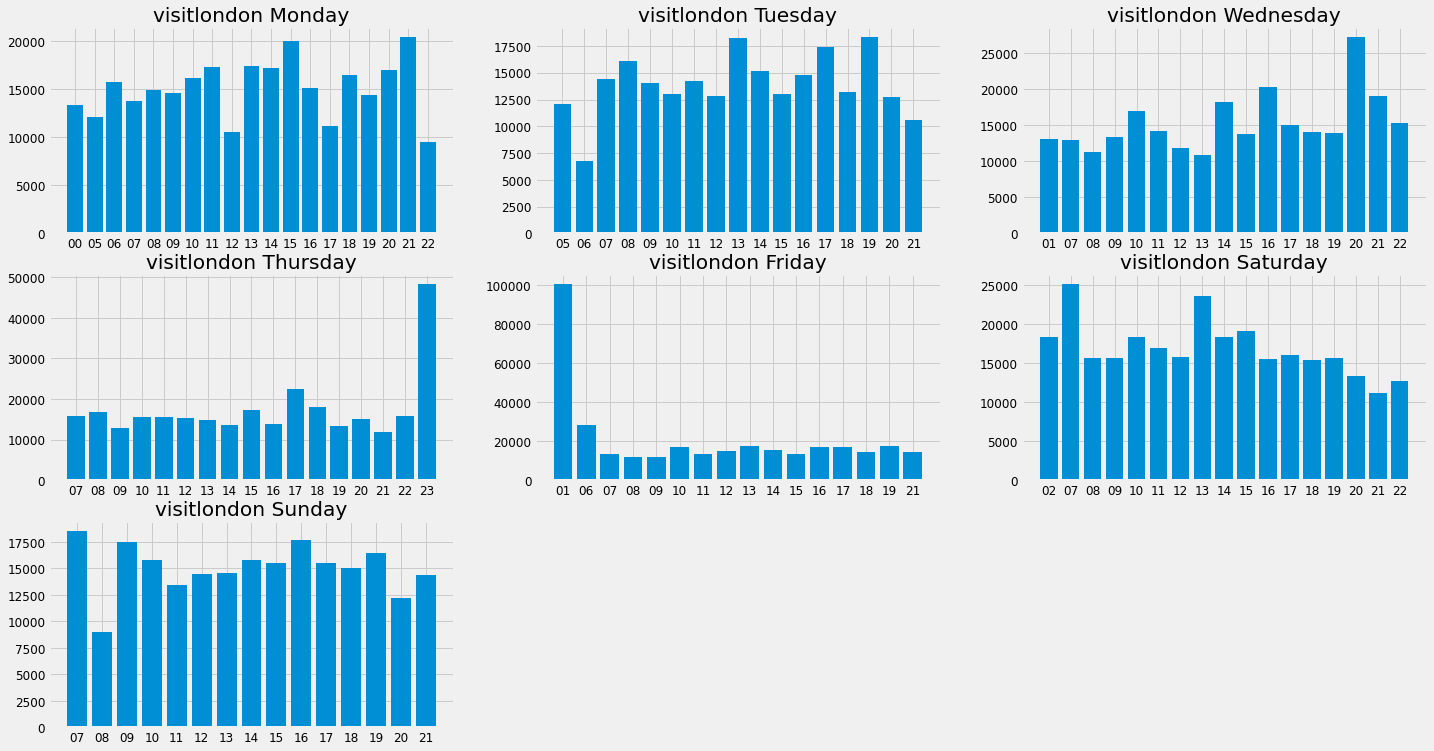

In [29]:
bar_time_plot(insta_names,df_images)

## How Many posts per day in average

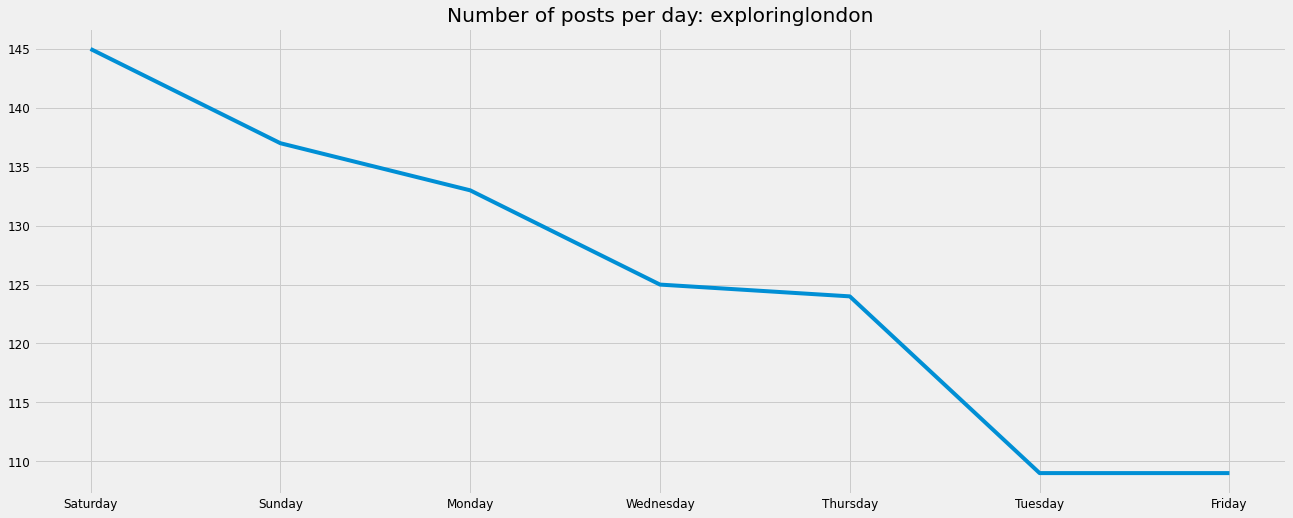

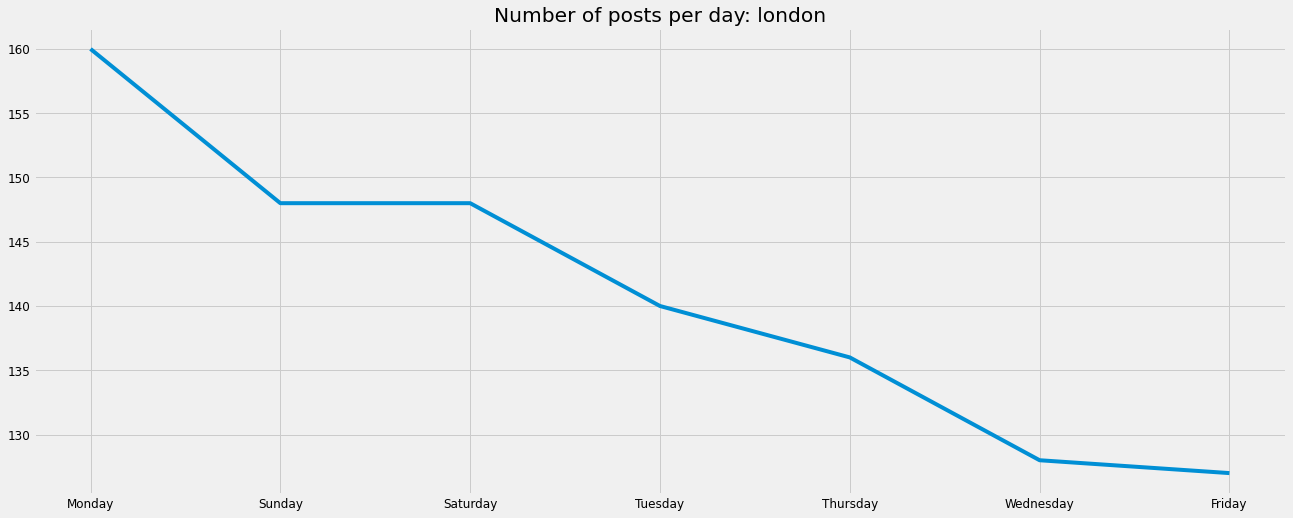

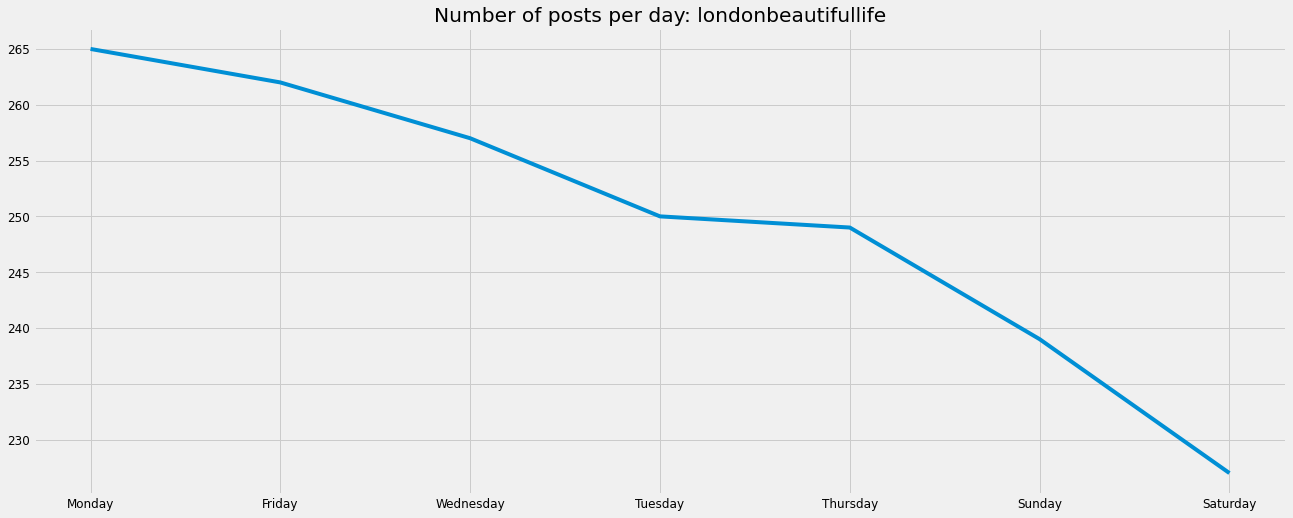

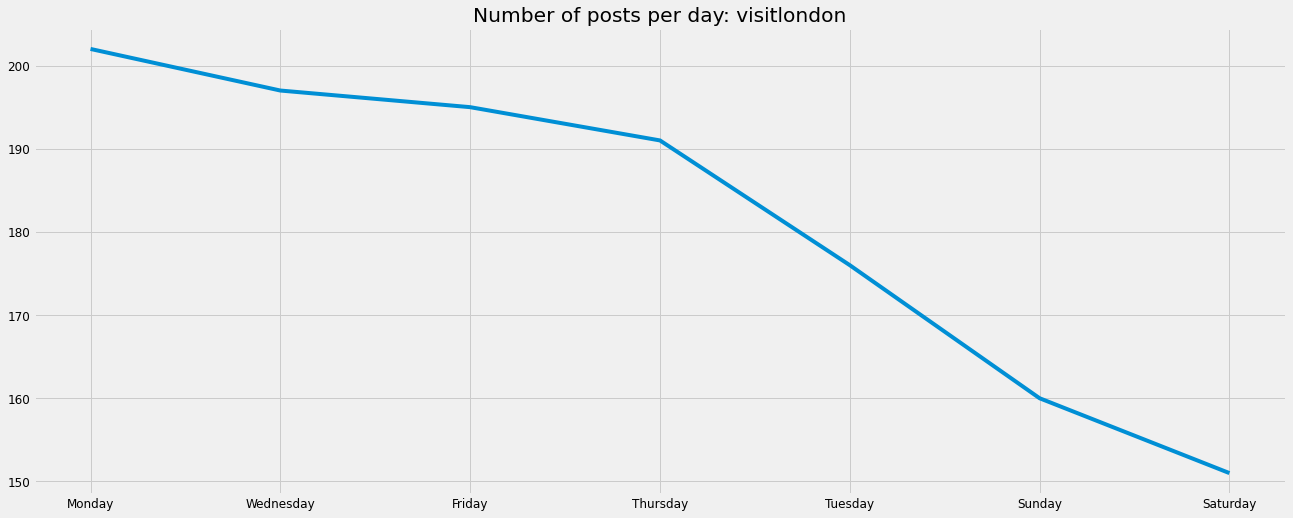

In [30]:
for i,nm in enumerate(insta_names): 
    my_df = df_images.loc[df_images['insta_name']==nm]
    plt.figure(figsize=(20,8))
    plt.plot(my_df['day'].value_counts())
    plt.title('Number of posts per day: ' + nm)

In [31]:
exploringlondon = df_images.loc[df_images['insta_name']=='exploringlondon']


In [ ]:
exploringlondon.groupby('day').sum()

In [ ]:
fig = plt.figure(figsize=(22,12))

for i,nm in enumerate(insta_names): 
    my_df = df_images.loc[df_images['insta_name']==nm]
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(my_df['day'].value_counts())
    ax.title.set_text(nm + " " + nm)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(exploringlondon['day'].value_counts())
plt.title('Number of posts per day')

In [ ]:
exploringlondon = exploringlondon.groupby('day')
exploringlondon.first()

## Save the dataframe as a CSV

In [ ]:
#df_images.to_csv('insta_cleaned.csv')